In [1]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np

warnings.filterwarnings("ignore")

df = pd.read_csv("datasets/diamonds.csv")

# display first few rows of data
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
# drop unnamed:0 column
df.drop(["Unnamed: 0"],1, inplace = True)

In [3]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# check for missing values
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [5]:
# data frame shape
df.shape

(53940, 10)

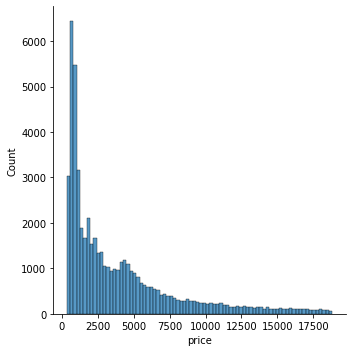

In [6]:
# check distribution of target variable (price)
sns.displot(df, x="price")

In [7]:
# statistics
df["price"].describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [8]:
# cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal) 
df['cut'] = df['cut'].replace(['Fair','Good', 'Very Good', 'Premium', 'Ideal'],['0', '1', '2', '3', '4'])

# color: diamond colour, from D (best to ) to J (worst) 
df['color'] = df['color'].replace(['D','E', 'F', 'G', 'H', 'I', 'J'],['6', '5', '4', '3', '2', '1', '0'])

# clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
df['clarity'] = df['clarity'].replace(['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],['0', '1', '2', '3', '4', '5', '6', '7'])

# check changes
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,4,5,1,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,5,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,5,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,0,1,63.3,58.0,335,4.34,4.35,2.75


In [9]:
from sklearn.model_selection import train_test_split

# splitting data
X = df.drop(["price"], 1)
y = df[["price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=0)

In [10]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg = dt_reg.fit(X_train, y_train)

# generating predictions for the decision tree regressor
y_pred_dt = dt_reg.predict(X_test)

In [11]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_dt= np.round(mean_squared_error(y_test, y_pred_dt), 2)
mse_dt

518625.63

In [12]:
# r2 score
from sklearn.metrics import r2_score
r2_score_dt = np.round(r2_score(y_test, y_pred_dt), 3)
r2_score_dt

0.967

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 100)
rf_reg = rf_reg.fit(X_train, y_train)

# generating predictions for the random forest regressor
y_pred_rf = rf_reg.predict(X_test)

In [16]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_rf = np.round(mean_squared_error(y_test, y_pred_rf), 2)
mse_rf

281342.03

In [17]:
# r2 score
from sklearn.metrics import r2_score
r2_score_rf = np.round(r2_score(y_test, y_pred_rf), 3)
r2_score_rf

0.982

In [18]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(n_estimators = 1000)
gb_reg = gb_reg.fit(X_train, y_train)

# generating predictions for the gradient boosting regressor
y_pred_gb = gb_reg.predict(X_test)

In [19]:
# mean squared error
from sklearn.metrics import mean_squared_error
mse_gb = np.round(mean_squared_error(y_test, y_pred_gb), 2)
mse_gb

266832.33

In [20]:
# r2 score
from sklearn.metrics import r2_score
r2_score_gb = np.round(r2_score(y_test, y_pred_gb), 3)
r2_score_gb

0.983

In [21]:
df_performance = pd.DataFrame([[mse_dt, r2_score_dt], [mse_rf, r2_score_rf], [mse_gb, r2_score_gb]], columns = ['MSE', 'R2 Score'], index = ['Single Decision Tree', 'Random Forest', 'Gradient Boosted Trees'])
df_performance

,MSE,R2 Score
Single Decision Tree,518625.63,0.967
Random Forest,281342.03,0.982
Gradient Boosted Trees,266832.33,0.983


In [22]:
df_feature_importance = pd.DataFrame(gb_reg.feature_importances_, index = X.columns, columns = ["Feature Score"])

# sort values into descending order
df_feature_importance.sort_values(by = "Feature Score", ascending=False, inplace = True)

df_feature_importance

,Feature Score
y,0.620573
carat,0.251462
clarity,0.059762
z,0.033398
color,0.028387
x,0.004487
depth,0.000874
cut,0.000690
table,0.000367
